## Write the simplest CNN for MNIST classification

Eventually we will go to training a CNN with less data

+  Vanilla
+  Data Aumentation (X)
+  Using pretrained for feature extraction (X)
+  transfer learning by fine tunning existing network (X)

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import keras
print(keras.__version__)

Using TensorFlow backend.


2.2.2


### Load dataset

In [3]:
from keras.datasets import mnist

In [4]:
(x_train,y_train), (x_test, y_test) = mnist.load_data()

In [5]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


### Transform the dataset

In [6]:
from keras.utils import to_categorical

In [7]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [8]:
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255



In [9]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


### Define the model

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [11]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               819712    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total para

In [13]:
model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

### train it

In [14]:
history = model.fit(x_train, y_train, validation_split=0.1, batch_size=32, epochs=3)

Train on 54000 samples, validate on 6000 samples
Epoch 1/3
54000/54000 [==============================] - 774s 14ms/step - loss: 0.1181 - acc: 0.9635 - val_loss: 0.0595 - val_acc: 0.9848
Epoch 2/3
54000/54000 [==============================] - 754s 14ms/step - loss: 0.0401 - acc: 0.9875 - val_loss: 0.0417 - val_acc: 0.9883
Epoch 3/3
54000/54000 [==============================] - 999s 18ms/step - loss: 0.0259 - acc: 0.9914 - val_loss: 0.0348 - val_acc: 0.9898


In [15]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 59s 6ms/step


[0.029649438415162148, 0.9898]

### plot it

In [16]:
history.history.keys()

dict_keys(['val_loss', 'acc', 'loss', 'val_acc'])

In [17]:
train_acc = history.history['acc']
train_loss = history.history['loss']

validation_acc = history.history['val_acc']
validation_loss = history.history['val_loss']


In [18]:
from matplotlib import pyplot as plt

In [19]:
epochs = range(1, len(train_acc)+1)

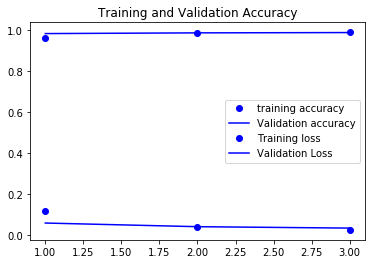

In [20]:
plt.plot(epochs, train_acc, 'bo', label='training accuracy')
plt.plot(epochs, validation_acc, 'b', label='Validation accuracy')

plt.title('Training and Validation Accuracy')
#plt.legend()

plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, validation_loss, 'b', label='Validation Loss')

plt.legend()

plt.show()